<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
# cargar datos
df = pd.read_csv("/content/data/anscombe.csv")

df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

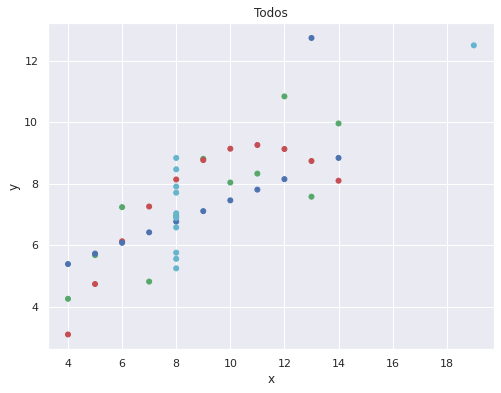

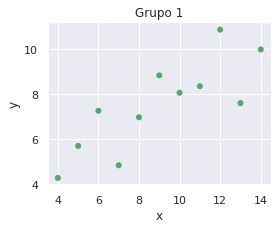

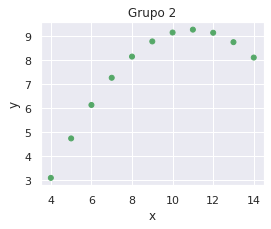

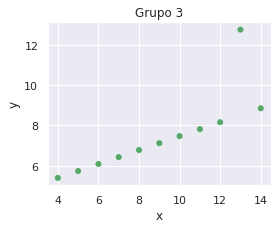

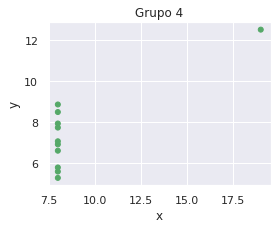

In [6]:
#1
x = df.x
y = df.y
f = df.grupo
N = f.shape[0]

area = np.full(N, 25)
area1 = np.ma.masked_where(f!="Grupo_1", area)
area2 = np.ma.masked_where(f!="Grupo_2", area)
area3 = np.ma.masked_where(f!="Grupo_3", area)
area4 = np.ma.masked_where(f!="Grupo_4", area)

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area1, c = "g")
sc = plt.scatter(x, y, s=area2, c = "r")
sc = plt.scatter(x, y, s=area3, c = "b")
sc = plt.scatter(x, y, s=area4, c = "c")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Todos")
plt.show()

plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, s=area1, c = "g")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grupo 1")
plt.show()

plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, s=area2, c = "g")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grupo 2")
plt.show()

plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, s=area3, c = "g")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grupo 3")
plt.show()

plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, s=area4, c = "g")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grupo 4")
plt.show()

In [7]:
#2
df_m=df["grupo"]=="Grupo_1"
df_1 = df[df_m]
print(df_1.describe())
df_m=df["grupo"]=="Grupo_2"
df_2 = df[df_m]
print(df_2.describe())
df_m=df["grupo"]=="Grupo_3"
df_3 = df[df_m]
print(df_3.describe())
df_m=df["grupo"]=="Grupo_4"
df_4 = df[df_m]
print(df_4.describe())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

Con la funcion describe podemos obtener de forma rapida datos importantes sobre nuestra muestra como el tamaño de esta, el valor promedio u otros valores mas utiles como los min, max o percentiles (25,50,75), osea una forma no grafica del grafico de cajas, y ademas estos datos los podemos usar para operar como queramos.
En estos casos podemos confirmar como el grupo 3 y 4 tienen un dato cada uno el cual es muy distinto al resto por lo que hace fallar los modelos (despues lo analizaremos con metricas) y podemos ver que debido al crecimiento "constante" (diferencia entre  min, 25%, 50%, 75%) de los grupos 1 y 3 podremos hallar un ajuste lineal bastante preciso.

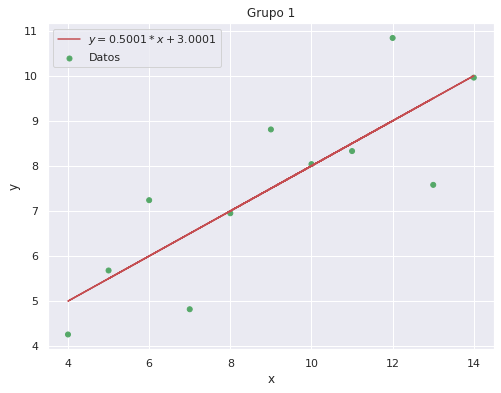

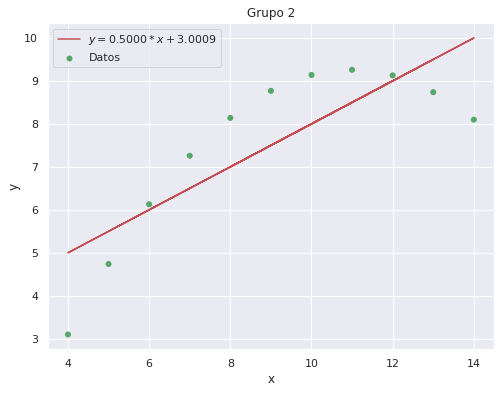

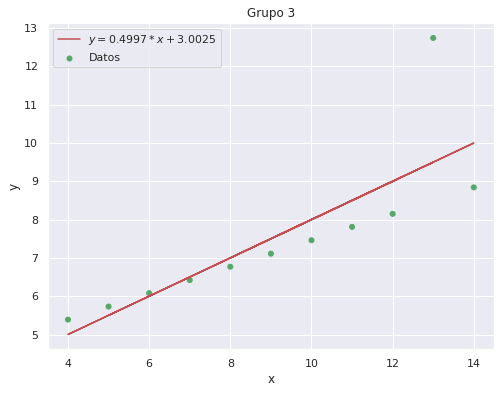

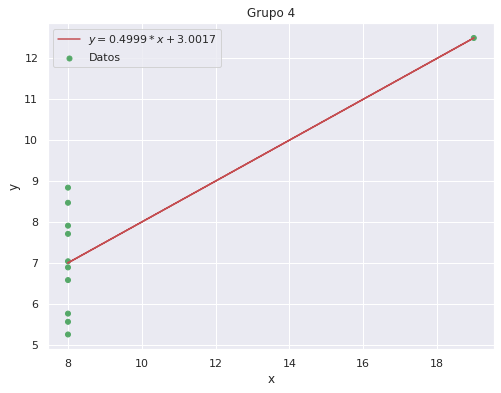

In [8]:
#3
npx1 = df_1["x"].values.reshape(-1,1)
npy1 = df_1["y"].values.reshape(-1,1)
LR1 = LinearRegression()
LR1.fit(npx1,npy1)
regresion1 = LR1.predict(npx1)
m1 = LR1.coef_[0][0]
c1 = LR1.intercept_[0]
legend1 = "$y = %0.4f*x %+0.4f$"%(m1,c1)

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area1, c = "g", label="Datos")
plt.plot(npx1, regresion1, label = legend1, c = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Grupo 1")
plt.show()

#=====#

npx2 = df_2["x"].values.reshape(-1,1)
npy2 = df_2["y"].values.reshape(-1,1)
LR2 = LinearRegression()
LR2.fit(npx2,npy2)
regresion2 = LR2.predict(npx2)
m2 = LR2.coef_[0][0]
c2 = LR2.intercept_[0]
legend2 = "$y = %0.4f*x %+0.4f$"%(m2,c2)

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area2, c = "g", label="Datos")
plt.plot(npx2, regresion2, label = legend2, c = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Grupo 2")
plt.show()

#=====#

npx3 = df_3["x"].values.reshape(-1,1)
npy3 = df_3["y"].values.reshape(-1,1)
LR3 = LinearRegression()
LR3.fit(npx3,npy3)
regresion3 = LR3.predict(npx3)
m3 = LR3.coef_[0][0]
c3 = LR3.intercept_[0]
legend3 = "$y = %0.4f*x %+0.4f$"%(m3,c3)

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area3, c = "g", label="Datos")
plt.plot(npx3, regresion3, label = legend3, c = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Grupo 3")
plt.show()

#=====#

npx4 = df_4["x"].values.reshape(-1,1)
npy4 = df_4["y"].values.reshape(-1,1)
LR4 = LinearRegression()
LR4.fit(npx4,npy4)
regresion4 = LR4.predict(npx4)
m4 = LR4.coef_[0][0]
c4 = LR4.intercept_[0]
legend4 = "$y = %0.4f*x %+0.4f$"%(m4,c4)

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area4, c = "g", label="Datos")
plt.plot(npx4, regresion4, label = legend4, c = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Grupo 4")
plt.show()

In [9]:
#4
def mae(y, yhat) -> float:
    metrica = np.mean(np.abs(y-yhat))
    return metrica

def rmse(y, yhat) -> float:
    metrica = np.mean((y-yhat)**2)
    return metrica

def mape(y, yhat) -> float: 
    metrica = np.mean(np.abs((y-yhat)/y))
    return metrica

def smape(y, yhat) -> float:
    metrica = np.mean(np.abs(y-yhat)/((np.abs(y)**2 + np.abs(yhat)**2)/2))
    return metrica

def rsquared(y, yhat) -> float:
    reg = np.sum((yhat - np.mean(y))**2)
    res = np.sum((y - yhat)**2)
    tot = reg + res
    metrica = reg/tot
    return metrica

print("Mean Absolute Error")
print(f"Grupo 1: {round(mae(npy1, regresion1),3)}")
print(f"Grupo 2: {round(mae(npy2, regresion2),3)}")
print(f"Grupo 3: {round(mae(npy3, regresion3),3)}")
print(f"Grupo 4: {round(mae(npy4, regresion4),3)}")

print("\nRoot Mean Squared Error")
print(f"Grupo 1: {round(rmse(npy1, regresion1),3)}")
print(f"Grupo 2: {round(rmse(npy2, regresion2),3)}")
print(f"Grupo 3: {round(rmse(npy3, regresion3),3)}")
print(f"Grupo 4: {round(rmse(npy4, regresion4),3)}")

print("\nMean Absolute Percentage Error")
print(f"Grupo 1: {round(mape(npy1, regresion1),3)}")
print(f"Grupo 2: {round(mape(npy2, regresion2),3)}")
print(f"Grupo 3: {round(mape(npy3, regresion3),3)}")
print(f"Grupo 4: {round(mape(npy4, regresion4),3)}")

print("\nSymmetric Mean Absolute Percentage Error")
print(f"Grupo 1: {round(smape(npy1, regresion1),3)}")
print(f"Grupo 2: {round(smape(npy2, regresion2),3)}")
print(f"Grupo 3: {round(smape(npy3, regresion3),3)}")
print(f"Grupo 4: {round(smape(npy4, regresion4),3)}")

print("\nR-Cuadrado")
print(f"Grupo 1: {round(rsquared(npy1, regresion1),3)}")
print(f"Grupo 2: {round(rsquared(npy2, regresion2),3)}")
print(f"Grupo 3: {round(rsquared(npy3, regresion3),3)}")
print(f"Grupo 4: {round(rsquared(npy4, regresion4),3)}")

Mean Absolute Error
Grupo 1: 0.837
Grupo 2: 0.968
Grupo 3: 0.716
Grupo 4: 0.903

Root Mean Squared Error
Grupo 1: 1.251
Grupo 2: 1.252
Grupo 3: 1.251
Grupo 4: 1.249

Mean Absolute Percentage Error
Grupo 1: 0.121
Grupo 2: 0.157
Grupo 3: 0.08
Grupo 4: 0.135

Symmetric Mean Absolute Percentage Error
Grupo 1: 0.017
Grupo 2: 0.023
Grupo 3: 0.01
Grupo 4: 0.019

R-Cuadrado
Grupo 1: 0.667
Grupo 2: 0.666
Grupo 3: 0.666
Grupo 4: 0.667


Con la metrica del porcentaje absoluto podemos confirmar que incluso teniendo un dato "extraño" el ajuste del grupo 3 es el que predijo con mayor precision la muestra de datos.
Ademas de esa misma metrica vemos que el grupo 2 es el que peor se ajusto a la prediccion por lo que seria conveniente probar algun otro modelo u otro metodo


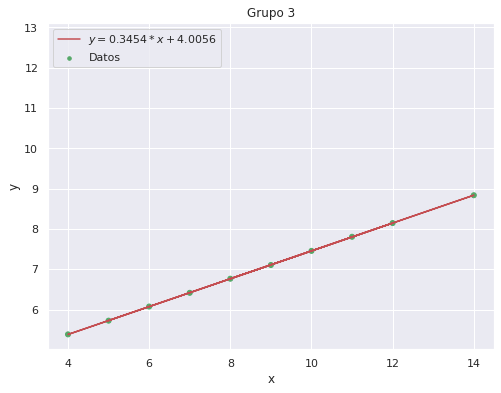

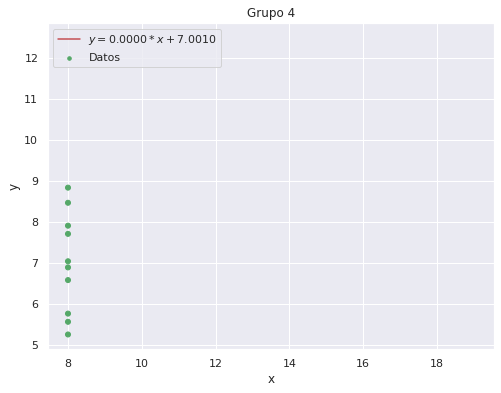

In [33]:
#5
#Para el grupo 1 basado en la informacion del inciso 2 creo que el ajuste lineal es suficientemente correcto y no posee ni un dato
#erroneo o falso que haga que la regresion sea errada por lo que no se modificara

#Para el grupo 2 por la forma de los datos la regresion es optimo hacerla con polinomios de grado mayor a 1, en este caso grado 2 sera suficiente
"""
pf = PolynomialFeatures(degree = 2)
npx2 = pf.fit_transform(df_2["x"].values.reshape(-1,1))
npy2 = df_2["y"].values.reshape(-1,1)
LR2 = LinearRegression()
LR2.fit(npx2, npy2)
regresion2 = LR2.predict(npx2)
legend2 = ""

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area2, c = "g", label="Datos")
plt.plot(npx2, regresion2, label = legend2, c = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Grupo 2")
plt.show()
"""

#Para el grupo 3 y 4 es claro que el problema para que el modelo no sea el correcto son outliers
#por lo que los eliminaremos y haremos la regresion nuevamente
outliers3 = np.where(df_3["y"]>10)
df_3b = df_3.drop(outliers3[0] + 22,axis=0)
for e in outliers3[0]:
  area3[e+22]=0

npx3 = df_3b["x"].values.reshape(-1,1)
npy3 = df_3b["y"].values.reshape(-1,1)
LR3 = LinearRegression()
LR3.fit(npx3,npy3)
regresion3 = LR3.predict(npx3)
m3 = LR3.coef_[0][0]
c3 = LR3.intercept_[0]
legend3 = "$y = %0.4f*x %+0.4f$"%(m3,c3)

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area3, c = "g", label="Datos")
plt.plot(npx3, regresion3, label = legend3, c = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Grupo 3")
plt.show()

#=====#

outliers4 = np.where(df_4["y"]>12)
df_4b = df_4.drop(outliers4[0] + 33,axis=0)
for e in outliers4[0]:
  area4[e+33]=0

npx4 = df_4b["x"].values.reshape(-1,1)
npy4 = df_4b["y"].values.reshape(-1,1)
LR4 = LinearRegression()
LR4.fit(npx4,npy4)
regresion4 = LR4.predict(npx4)
m4 = LR4.coef_[0][0]
c4 = LR4.intercept_[0]
legend4 = "$y = %0.4f*x %+0.4f$"%(m4,c4)

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, s=area4, c = "g", label="Datos")
plt.plot(npx4, regresion4, label = legend4, c = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Grupo 4")
plt.show()

Para el grupo 1 basado en la informacion del inciso 2 creo que el ajuste lineal es suficientemente correcto y no posee ni un dato erroneo o falso que haga que la regresion sea errada por lo que no se modificara

Para el grupo 2 por la forma de los datos la regresion es optimo hacerla con polinomios de grado mayor a 1, en este caso grado 2 sera suficiente.

Para el grupo 3 y 4 es claro que el problema para que el modelo no sea el correcto son outliers por lo que los eliminaremos y haremos la regresion nuevamente